In [48]:
# import numpy as np                # use for array and matrix stuff
import pandas as pd               # use for dataframes, think of it as excel
# import math
# import matplotlib as mpl
import matplotlib.pyplot as plt   # use to make graphs
# import seaborn as sns
# from collections import Counter
# import helpers
# # import graphs
# import matplotlib.ticker as mtick
# import functools
# from textwrap import wrap
# import re
from wordcloud import WordCloud

In [78]:
df_dhp = pd.read_csv('') ## contains PII
df_school = pd.read_csv('school.csv')
df_job_title = pd.read_csv('timeline_job_title.csv')
df_ft_jobs = pd.read_csv('full_time_jobs.csv')
df_fuf = pd.read_csv('') ## contains PII
df_life = pd.read_csv('') ## contains PII

In [56]:
def create_wordcloud(
    df,                         # pandas dataframe, shown in format below
    column_name,                # column name in dataframe

    file_name = None,           # name of the wordcloud image
    width: int = 1280,           # width of the image
    height: int = 720,          # height of the image
    background_color = 'white', # str: colours or hex representation of colour. Use None for transparent background, but this doesn't work
    include_numbers = True,     # include numbers when plotting words in wordcloud
    stopwords = None,           # set. Pass in a set of words to ignore. Ex: ('The', 'it', 'a', 'because', ...) If None, default stopwords are used,
    drop_values = [],
    colormap = 'Dark2'
):
    """
    Dataframe input format:
    +-------------+
    | column_name |
    +-------------+
    | string 1    |
    | string 2    |
    | string 3    |
    | ...         |
    +-------------+
    """
    if(df[column_name].isnull().values.any()):
        df[column_name] = df[column_name].dropna(axis=0)

    count = Counter()
    column_values = helpers.splice_cells_with_commas(df, column_name)
    for i in column_values:
        count[i] += 1
        
    if(drop_values):
        for i in drop_values:
            if(i in count):
                del count[i]
    
    wordcloud = WordCloud(
        width = width, 
        height = height, 
        background_color = background_color,
        include_numbers = include_numbers,
        stopwords = stopwords,
        colormap = colormap,
    ).generate_from_frequencies(count)

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")

    if(not file_name):
        file_name = str(column_name)
    wordcloud.to_file('./graphs/' + file_name + '_wordmap.png')

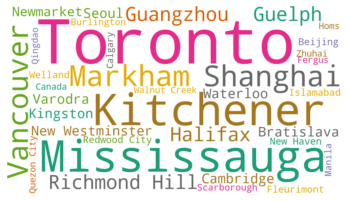

In [32]:
df_birth_loc = df_dhp[['birth_location']]
df_birth_loc = df_birth_loc.dropna()
df_birth_loc['birth_location'] = df_birth_loc['birth_location'].map(lambda x: x.split(',')[0])

create_wordcloud(
    df_birth_loc,
    'birth_location'
)

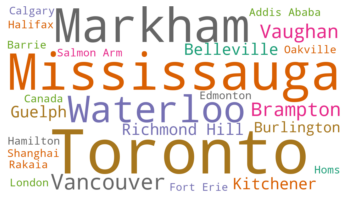

In [33]:
df_hometown_loc = df_dhp[['hometown_location']]
df_hometown_loc = df_hometown_loc.dropna()
df_hometown_loc['hometown_location'] = df_hometown_loc['hometown_location'].map(lambda x: x.split(',')[0])

create_wordcloud(
    df_hometown_loc,
    'hometown_location'
)

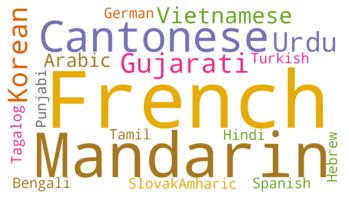

In [40]:
df_number_languages = df_dhp[['number_languages']]
df_number_languages = df_number_languages.dropna()

create_wordcloud(
    df_number_languages,
    'number_languages',
    drop_values = ['English']
)

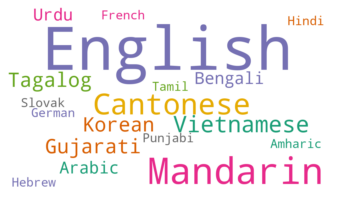

In [41]:
df_languages = df_dhp[['languages']]
df_languages = df_languages.dropna()

create_wordcloud(
    df_languages,
    'languages',
    file_name = 'langauges_spoken_at_home'
)

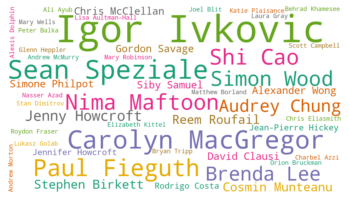

In [31]:
df_fav_profs = df_school[['fav_profs']]
df_fav_profs = df_fav_profs.dropna()

create_wordcloud(
    df_fav_profs,
    'fav_profs'
)

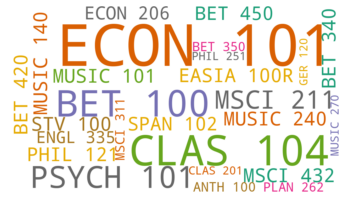

In [47]:
course_list = [
    'te',
    'cse',
    'fav_core',
    'least_fav_core',
    'fav_te',
    'least_fav_te',
    'fav_cse',
    'least_fav_cse'
]

for course in course_list:
    df_temp = df_school[[course]]
    df_temp = df_temp.dropna()
    
    create_wordcloud(
        df_temp,
        course
    )

In [69]:
job_title_column_list = [
    'job_title_c1',
    'job_title_c2',
    'job_title_c3',
    'job_title_c4',
    'job_title_c5',
    'job_title_c6'
]

job_title_list = []
for i in job_title_column_list:
    job_title_list.extend(df_job_title[i].tolist())

df_job_title_working = pd.DataFrame({'job_title': job_title_list})
df_job_title_working = df_job_title_working.dropna()
df_job_title_working['job_title'] = df_job_title_working['job_title'].map(lambda x: x.title())

create_wordcloud(
    df_job_title_working,
    'job_title',
    colormap = 'tab10'
)

,job_title
41,Ui/Ux Designer
51,Ui/Ux Designer
143,Ui/Ux Designer
164,Ui/Ux Designer
170,Seo & Ui/Ux Development


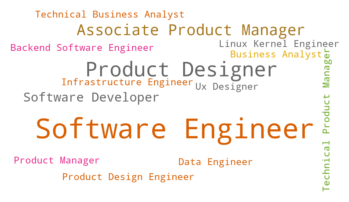

In [72]:
df_ft_title = df_ft_jobs[['ft_job_title']]
df_ft_title = df_ft_title.dropna()
df_ft_title['ft_job_title'] = df_ft_title['ft_job_title'].map(lambda x: x.title())

create_wordcloud(
    df_ft_title,
    'ft_job_title'
)

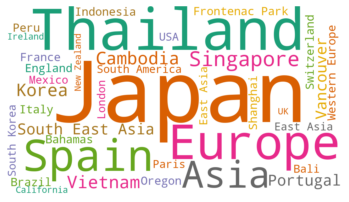

In [76]:
df_grad_trip = df_fuf[['grad_trip_location']]
df_grad_trip = df_grad_trip.dropna()
df_grad_trip['grad_trip_location'] = df_grad_trip['grad_trip_location'].map(lambda x: x.split(", "))
df_grad_trip = df_grad_trip.explode('grad_trip_location')

create_wordcloud(
    df_grad_trip,
    'grad_trip_location'
)

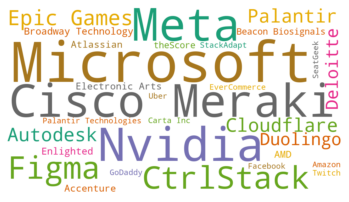

In [77]:
df_ft_company = df_fuf[['ft_company']]
df_ft_company = df_ft_company.dropna()

create_wordcloud(
    df_ft_company,
    'ft_company'
)

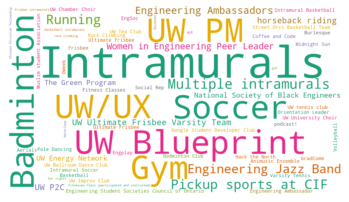

In [85]:
def clean_ec(value):
    if(value == 'horseback riding, '):
        value = 'horseback riding'
    elif('intramural teams (frisbee, soccer, basketball)' in value):
        value = value.replace('intramural teams (frisbee, soccer, basketball)', 'Intramurals')
    return value

df_ec = df_life[['consistent_ec']]
df_ec = df_ec.dropna()
df_ec['consistent_ec'] = df_ec['consistent_ec'].apply(clean_ec)

create_wordcloud(
    df_ec,
    'consistent_ec'
)

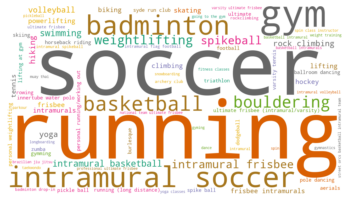

In [87]:
def clean_sports(value):
    if(value == 'Fitness Classes (spin, yoga, zumba), Spin Class Instructor'):
        value = 'Fitness Classes, Spin Class Instructor'
    elif(' (personal)' in value):
        value = value.replace(' (personal)', '')
    elif('frisbee (intramural and personal)' in value):
        value = value.replace('frisbee (intramural and personal)', 'frisbee')
    return value

df_sports = df_life[['sports']]
df_sports = df_sports.dropna()
df_sports['sports'] = df_sports['sports'].apply(clean_sports).map(lambda x: x.lower())

create_wordcloud(
    df_sports,
    'sports'
)

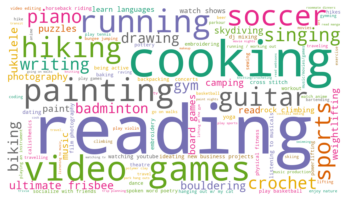

In [89]:
df_hobbies = df_life[['hobbies']]
df_hobbies = df_hobbies.dropna()
df_hobbies['hobbies'] = df_hobbies['hobbies'].map(lambda x: x.lower())

create_wordcloud(
    df_hobbies,
    'hobbies'
)